In [1]:
"""
Developed by Shayan Sepahvand, December 2023, Toronto Met. Univ.
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL.Image

2024-01-08 18:03:35.432795: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-08 18:03:35.458967: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.1


Load the images

In [3]:
def load_images_from_folder(directory):
    images = []
    fileslist = os.listdir(directory)
    fileslist = sorted(fileslist , key = lambda fileslist: int(fileslist.split('.')[0]))
    for filename in fileslist:
        #img = cv.imread(os.path.join(directory,filename))
        loc = os.path.join(directory,filename)
        img = tf.keras.preprocessing.image.load_img(loc, target_size=(300, 300))
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        if img is not None:
            images.append(img)
    return np.asarray(images)

Load the angles (labels)

In [4]:
def load_angles_from_folder(directory):
    with open(directory,'r')  as ff:
        content = ff.readline()
        angles = content.split(sep='\t') #lines are separated by tabs
        angles = np.asarray(angles, dtype = np.float32) * (np.pi/180)
        return angles

Load the images and angles

In [5]:
directory_imgs = './Dataset/imgs/'
directory_angles = './Dataset/Labels.txt'
imgs = load_images_from_folder(directory_imgs)
angles = load_angles_from_folder(directory_angles)

Define the Testing Datasets

In [6]:
testing_imgs = imgs[900:]
testing_angles = angles[900:]

Load the trained CNN

In [7]:
model = tf.keras.models.load_model('TrainedCNNs/for_test(fine_tunned)_corr')
#model.summary() 
#model.get_config()

2024-01-08 18:03:38.480586: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-08 18:03:38.483501: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-08 18:03:38.483587: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Evaluate the model for test dataset

In [8]:
loss = model.evaluate(testing_imgs , testing_angles, batch_size = 8)

2024-01-08 18:03:39.138405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8906


13/13 [==============================] - 2s 88ms/step - loss: 0.0080 - mean_absolute_error: 0.0714


Tries to load several image from the test dataset and determine the estimated angle versus the real angle

In [9]:
def return_estimated_angles():
    predicted_angles_list = []
    for testimage in testing_imgs:
        test_img = np.expand_dims(testimage , axis = 0)
        predicted_angles = model.predict(test_img , verbose = 0)
        predicted_angles_list.append(predicted_angles)


    return np.array(predicted_angles_list)

Let's plot the estimated angles vs real angles

In [10]:
predicted_angles = return_estimated_angles()
predicted_angles = np.ndarray.flatten(predicted_angles)

/tmp/ipykernel_94871/870608610.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(SampleNo , predicted_angles, markerfmt='ro' , linefmt = '--')
/tmp/ipykernel_94871/870608610.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(SampleNo, testing_angles, markerfmt='bs' , linefmt = '--')


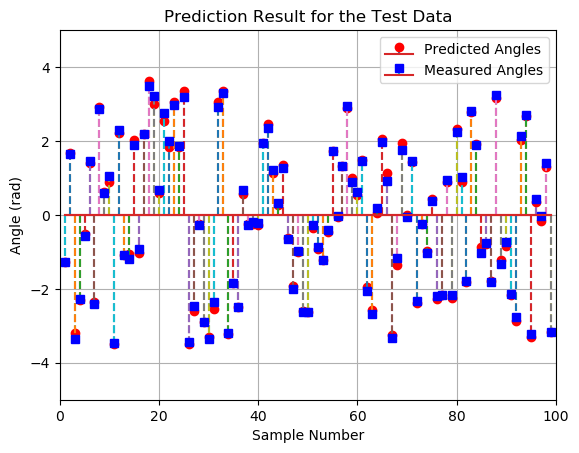

In [11]:
SampleNo = np.arange(1,len(testing_angles) + 1)
# Create a scatter plot for the first set of data (blue color)
plt.stem(SampleNo , predicted_angles, markerfmt='ro' , linefmt = '--')

# Create a scatter plot for the second set of data (red color)
plt.stem(SampleNo, testing_angles, markerfmt='bs' , linefmt = '--')


# Add labels and a legend
plt.xlabel('Sample Number')
plt.ylabel('Angle (rad)')
plt.legend(['Predicted Angles', 'Measured Angles'])
plt.title('Prediction Result for the Test Data')
plt.grid(visible=True)
plt.ylim((-5,5))
plt.xlim((0,100))

# Show the plot
plt.show()


Scatter Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


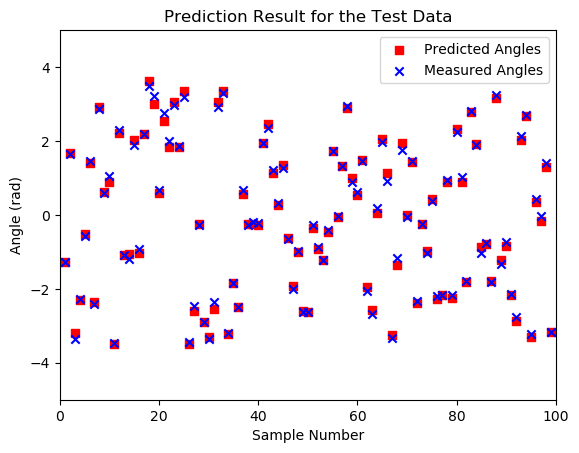

In [12]:
plt.scatter(SampleNo, predicted_angles, c = 'red', marker= 's')
plt.scatter(SampleNo, testing_angles, c = 'blue', marker= 'x' )
plt.xlabel('Sample Number')
plt.ylabel('Angle (rad)')
plt.legend(['Predicted Angles', 'Measured Angles'])
plt.title('Prediction Result for the Test Data')
plt.grid(visible=False)
plt.ylim((-5,5))
plt.xlim((0,100))
plt.savefig('./Results_Paper/prediction_fin_tuned.eps', format='eps')

Error Plot

In [13]:
predition_error = (predicted_angles - testing_angles)
predition_error_abs = abs(predicted_angles - testing_angles)
print(np.mean(abs(predition_error)))
print(np.max(abs(predition_error)))
print(np.min(abs(predition_error)))
'''font = {'weight' : 'normal',
        'size'   : 8}
plt.rc ('font', **font)'''
'''plt.stem(SampleNo , predition_error , markerfmt='ro' )

MaxError = np.max(predition_error_abs) * np.ones(shape=(len(predition_error),))
plt.plot(SampleNo,   MaxError , color = 'pink')
MeanError = np.mean(predition_error_abs) * np.ones(shape=(len(predition_error),))
plt.plot(SampleNo,   MeanError , color = 'green')
plt.xlabel('Sample Number')
plt.ylabel('Predition Error (rad)')
#plt.legend(['Predicted Angles', 'Measured Angles'])
plt.title('Prediction Error for the Test Data')
plt.grid(visible=True)
plt.ylim((-0.3,0.3))
plt.xlim((0,100))
plt.legend(['Max Absolute Error', 'Mean Absolute Error', 'Prediction Error Angles'])
plt.savefig('./Results_Paper/Prediction_Error_val.eps', format='eps')'''

0.07134438
0.21234399
0.0011303425


"plt.stem(SampleNo , predition_error , markerfmt='ro' )\n\nMaxError = np.max(predition_error_abs) * np.ones(shape=(len(predition_error),))\nplt.plot(SampleNo,   MaxError , color = 'pink')\nMeanError = np.mean(predition_error_abs) * np.ones(shape=(len(predition_error),))\nplt.plot(SampleNo,   MeanError , color = 'green')\nplt.xlabel('Sample Number')\nplt.ylabel('Predition Error (rad)')\n#plt.legend(['Predicted Angles', 'Measured Angles'])\nplt.title('Prediction Error for the Test Data')\nplt.grid(visible=True)\nplt.ylim((-0.3,0.3))\nplt.xlim((0,100))\nplt.legend(['Max Absolute Error', 'Mean Absolute Error', 'Prediction Error Angles'])\nplt.savefig('./Results_Paper/Prediction_Error_val.eps', format='eps')"

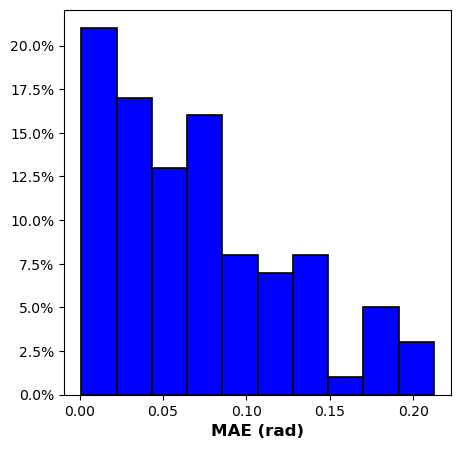

In [14]:
from matplotlib.ticker import PercentFormatter
figure1 = plt.figure(figsize=(5,5))
n_bins = 10;
n, bins, patches = plt.hist(predition_error_abs , bins = n_bins, density = False , color = 'b' , edgecolor='black', linewidth=1.2 , facecolor="blue")
plt.xlabel("MAE (rad)" , fontsize = 12 , weight='bold')
#plt.ylabel("Count",fontsize = 12 , weight='bold')
plt.grid(visible = False, which = 'both')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))

#----------------------------------------------------------------------



plt.savefig('./Results_Paper/error_distribution_finetuned.eps', format='eps')